# Presentacion

Trabajo Final Deep Learning - Aplicacion de una Red Neuronal Convolucional

Autor: Dariel Josias Solórzano Ortega

Objetivo: Desarrollar una Red Neuronal Convolucional que sera entrenada por medio de un dataset proveniente de la libreria Keras de Tensorflow llamado CIFAR10, el cual posee 10 clases diferentes de imagenes con 60,000 imagenes por cada clase, con el proposito de poder predecir a que clase pertenecen las imagenes que proporcionemos a nuestra red neuronal.

# Librerias

In [ ]:
import sys
sys.executable

'e:\\EspecializacionDMC\\EntornoProyectos\\Scripts\\python.exe'

In [ ]:
#!{sys.executable} -m pip install tensorflow

In [ ]:
# CNN y dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image

# Visualizacion
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Metricas de Evaluacion
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
tf.__version__

'2.11.0'

# Preprocesamiento

## Extraccion

In [ ]:
(X_train_img, y_train_class), (X_test_img, y_test_class) = datasets.cifar10.load_data()

Obs: Cargamos la data del cifar10

In [ ]:
(X_train_img.shape, X_test_img.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

<p>Obs: Verificamos el tamaño de nuestra data de entramiento y testeo <br></p>
<p> Train:  50,000 imagenes de 32x32 y 3 es por los canales RGB (imagenes a color) <br></p>
<p> Test:   10,000 imagenes de 32x32 y 3 es por los canales RGB (imagenes a color) <br></p>

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Obs: Definimos un lista con los nombres de las clases

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[int(y[index])])

Obs: Definimos una funcion para mostrar algunos ejemplos de las imagenes cargadas

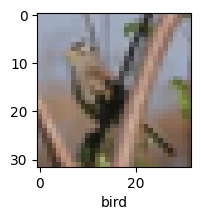

In [ ]:
plot_sample(X_train_img, y_train_class, 3535)

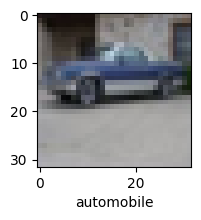

In [ ]:
plot_sample(X_train_img, y_train_class, 10000)

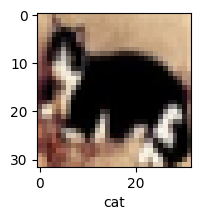

In [ ]:
plot_sample(X_train_img, y_train_class, 15444)

## Transformacion

In [ ]:
X_train_img = X_train_img / 255.0
X_test_img = X_test_img / 255.0

Obs: Buscamos normalizar la data por lo cual lo dividimos entre 255. Esto se debe a que como presenta 3 canales RGB, los pixeles se encuentran entre 0 - 255 luego de normalizarlo estaran entre 0 - 1.

# Creacion de la Red Neuronal Convolucional

In [ ]:
# Inicializamos
cnn = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # Capa de Convolucion
        # 32 filtros
        # Activacion relu :solucionar la presencia de valores negativos que tomaran el valor de 0 y los positivos su mismo valor
        # Matriz de 3x3
        # Solo a la primera capa se le coloca el input_shape (3 dimensiones) por que recibe a la data como neurona de entrada
    layers.MaxPooling2D((2, 2)), # Capa de reduccion o Pooling
        # Reducimos la img a una de 2x2

    # Segunda capa convolucional
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # Capa de Convolucion
    layers.MaxPooling2D((2, 2)), # Capa de reduccion o Pooling
        # Reducimos la img a una matriz de 2x2

    layers.Flatten(), # Flattening o vectorizacion de salidas: Pasarlos nuestros datos de 2x2 a uno de 1 dimension pasando a ser neuronas de entrada

    # Fully Connection: Interconecciones entre neuronas de entrada, neuronas ocultas y neuronas de salida
    layers.Dense(64, activation='relu'), # Capa Oculta
        # Usaremos 64 neuronas con activacion relu
    layers.Dense(10, activation='softmax') # Capa de Salida
        # Usaremos 10 neuronas con activacion softmax, se usa cuando nuestras probabilidades de salida no comparten una suma igual al 100% por
        #lo cual recurrimos a la funcion de softmax. (normalizar)
])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Compilacion de la CNN

## 7mo Intento

In [ ]:
history = cnn.fit(X_train_img, y_train_class, epochs=11, validation_data=(X_test_img, y_test_class))

Epoch 1/11
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4739 - accuracy: 0.4727 - val_loss: 1.2350 - val_accuracy: 0.5623
Epoch 2/11
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1175 - accuracy: 0.6131 - val_loss: 1.0727 - val_accuracy: 0.6219
Epoch 3/11
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9957 - accuracy: 0.6543 - val_loss: 0.9825 - val_accuracy: 0.6627
Epoch 4/11
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9117 - accuracy: 0.6836 - val_loss: 0.9284 - val_accuracy: 0.6815
Epoch 5/11
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8457 - accuracy: 0.7097 - val_loss: 0.8949 - val_accuracy: 0.6949
Epoch 6/11
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7922 - accuracy: 0.7261 - val_loss: 0.9036 - val_accuracy: 0.6891
Epoch 7/11
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7457 - accuracy: 0.7429 - val_loss: 0.9167 -

In [ ]:
y_pred = cnn.predict(X_test_img)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test_class, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.88      0.77      0.82      1000
           2       0.62      0.61      0.62      1000
           3       0.56      0.47      0.51      1000
           4       0.64      0.64      0.64      1000
           5       0.57      0.65      0.61      1000
           6       0.77      0.77      0.77      1000
           7       0.73      0.76      0.75      1000
           8       0.79      0.82      0.80      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



## Ultimo Intento

Obs: Definimos nuestros datos de entrenamiento y validacion
    Seleccionamos 32 epocas por que nuestra data de entrenamiento es de 50,000 y en cada epoca se tiene un batch size de 1563 al dividir ambos numeros nos da aproximadamente 32.

Obs: 2 primeros datos son del entrenamiento y los otros 2 del testeo

In [ ]:
history = cnn.fit(X_train_img, y_train_class, epochs=32, validation_data=(X_test_img, y_test_class))

Epoch 1/32
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4555 - accuracy: 0.4783 - val_loss: 1.2299 - val_accuracy: 0.5650
Epoch 2/32
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1030 - accuracy: 0.6130 - val_loss: 1.0391 - val_accuracy: 0.6364
Epoch 3/32
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9605 - accuracy: 0.6640 - val_loss: 0.9713 - val_accuracy: 0.6596
Epoch 4/32
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8706 - accuracy: 0.6991 - val_loss: 0.9235 - val_accuracy: 0.6831
Epoch 5/32
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7972 - accuracy: 0.7217 - val_loss: 0.9070 - val_accuracy: 0.6855
Epoch 6/32
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7330 - accuracy: 0.7447 - val_loss: 0.9042 - val_accuracy: 0.6888
Epoch 7/32
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6821 - accuracy: 0.7630 - val_loss: 0.9270 -

Obs: El valor del loss se ha reducido , el accuracy fue de 0.9496 (este mejoro en la epoca 11) pero con respecto a nuestra data de testeo es de 0.6723

# Predicciones

In [ ]:
path_image_avion = r'E:\EspecializacionDMC\Practico\TrabajoFinal_DeepLearning\img\avion.jpg'
path_image_automovil = r'E:\EspecializacionDMC\Practico\TrabajoFinal_DeepLearning\img\auto.jpg'
path_image_rana = r'E:\EspecializacionDMC\Practico\TrabajoFinal_DeepLearning\img\rana.jpg'

Obs: Vamos a cargar 3 ejemplos de distintas clases

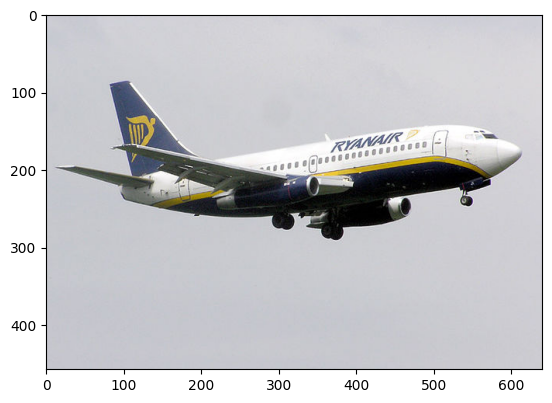

In [ ]:
img = mpimg.imread(path_image_avion)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
test_image = image.load_img(path_image_avion, target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print("Predicción - Clase: "+class_names[result.argmax()])

1/1 [==============================] - 0s 27ms/step
Predicción - Clase: airplane


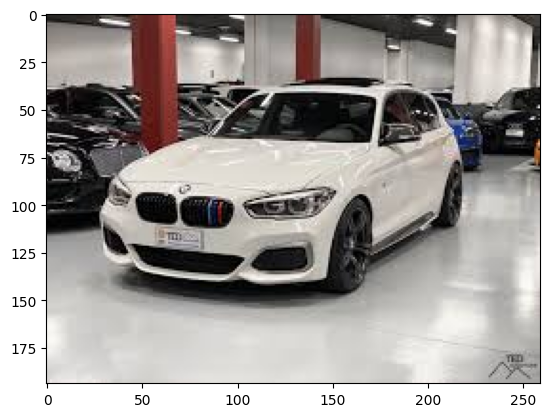

In [ ]:
img = mpimg.imread(path_image_automovil)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
test_image = image.load_img(path_image_automovil, target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print("Predicción - Clase: "+class_names[result.argmax()])

1/1 [==============================] - 0s 23ms/step
Predicción - Clase: automobile


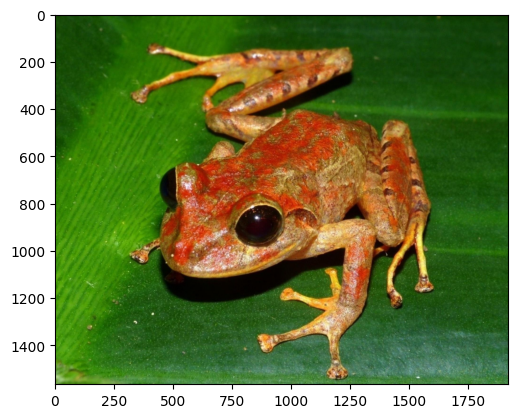

In [ ]:
img = mpimg.imread(path_image_rana)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
test_image = image.load_img(path_image_rana, target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print("Predicción - Clase: "+class_names[result.argmax()])

1/1 [==============================] - 0s 23ms/step
Predicción - Clase: frog


# Resultados

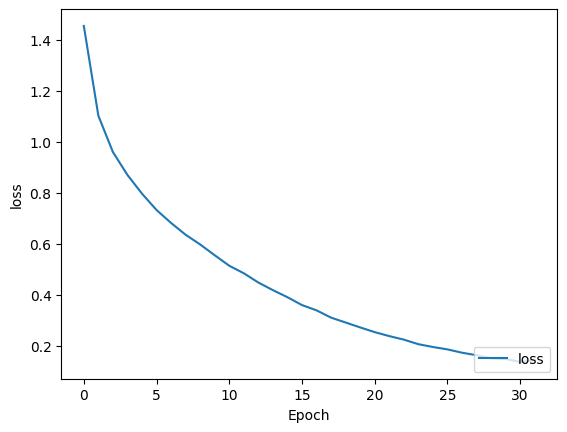

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

Obs: Como mencionamos previamente la perdida ha ido reduciendo significativamente en cada epoca

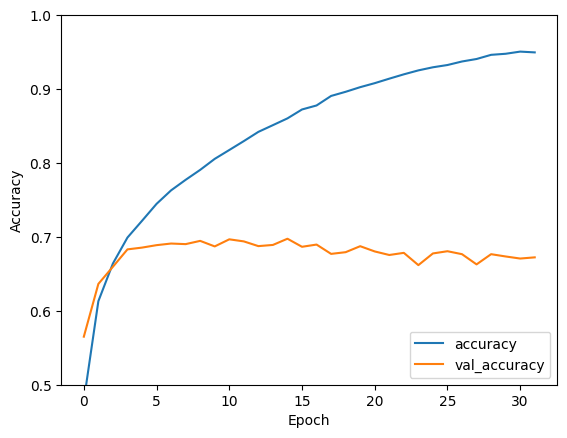

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Obs: Podemos notar que entre la epocas 3 se puede obtener un valor casi optimo